## Category: Getting Started

### Task 1: Import Modules and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import numpy as np
import nltk
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from collections import defaultdict
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# downloading text processing libraries
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Category: Loading Data

### Task 2: Load and Explore the Genes and Variations Dataset

In [2]:
variations=pd.read_csv('training_variants.txt')
variations.shape
variations.columns
variations.head(5)
variations.dtypes
variations.nunique
variations.head(5) 

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


### Task 3: Load the Text Dataset

In [3]:
Text_data=pd.read_csv('training_text.txt',sep="\|\|",names=["ID","Text"],skiprows=1)
Text_data.shape
Text_data.columns.values
Text_data.head(5)

C:\Users\sneha\AppData\Local\Temp\ipykernel_14700\390795323.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Text_data=pd.read_csv('training_text.txt',sep="\|\|",names=["ID","Text"],skiprows=1)


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


## Category: Text Pre-processing

### Task 4: Define the Function for Pre-processing

In [4]:
stop_words=stopwords.words('english')
def data_preprocessing(text):
    text=re.sub('[^a-zA-Z0-9\n]',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.lower()
    words=word_tokenize(text)
    final_words=[word for word in words if word not in stop_words]
    final_text=' '.join(final_words)
    return final_text
    


### Task 5: Pre-process the Data

In [5]:
for idx,data in Text_data.iterrows():
    if isinstance(data['Text'],str):
        Text_data['Text'][idx]=data_preprocessing(data['Text'])
    else:
        print("Corresponding text data missing for data point number:", idx)


C:\Users\sneha\AppData\Local\Temp\ipykernel_14700\3426770876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Text_data['Text'][idx]=data_preprocessing(data['Text'])


Corresponding text data missing for data point number: 1109
Corresponding text data missing for data point number: 1277
Corresponding text data missing for data point number: 1407
Corresponding text data missing for data point number: 1639
Corresponding text data missing for data point number: 2755


### Task 6: Merge Datasets, Clean, and Impute Values

In [6]:
total_df=pd.merge(variations,Text_data,how='left',on='ID')
total_df['Text']=total_df['Text'].fillna(total_df['Gene']+' '+total_df['Variation'])

In [7]:
total_df['Gene']=total_df['Gene'].str.replace('\s+','_')
total_df['Variation']=total_df['Variation'].str.replace('\s+','_')
total_df.head()

C:\Users\sneha\AppData\Local\Temp\ipykernel_14700\2241041379.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  total_df['Gene']=total_df['Gene'].str.replace('\s+','_')
C:\Users\sneha\AppData\Local\Temp\ipykernel_14700\2241041379.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  total_df['Variation']=total_df['Variation'].str.replace('\s+','_')


,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


## Category: Train-test Split

### Task 7: Perform Train-test Split

In [8]:
init_train_df,test_df=train_test_split(total_df,test_size=0.2, stratify=total_df['Class'])
train_df, cv_df = train_test_split(init_train_df, test_size=0.2, stratify=init_train_df['Class'])
# Extract the target variables
y_train = train_df['Class'].values
y_cv = cv_df['Class'].values
y_test = test_df['Class'].values

# Drop the 'Class' column from the datasets
x_train = train_df.drop(columns=['Class'])
x_cv = cv_df.drop(columns=['Class'])
x_test = test_df.drop(columns=['Class'])

### Task 8: Check Distribution of Dataset

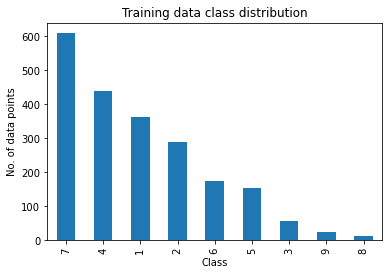

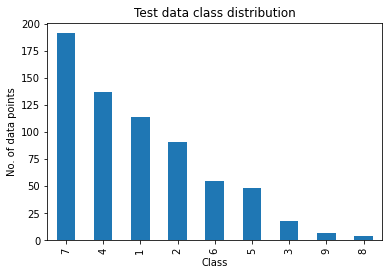

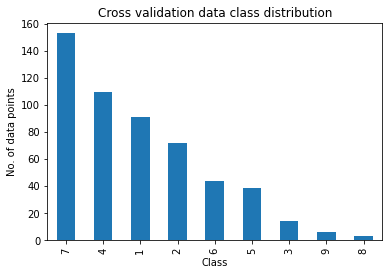

In [9]:
train_df['Class'].value_counts().plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('No. of data points')
plt.title('Training data class distribution')
plt.show()

test_df['Class'].value_counts().plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('No. of data points')
plt.title('Test data class distribution')
plt.show()

cv_df['Class'].value_counts().plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('No. of data points')
plt.title('Cross validation data class distribution')
plt.show()

## Category: Measure Performance Using Random Model

### Task 9: Define a Function to Plot Performance Matrices

In [10]:
def plot_heatmap(matrix, labels, title):
    plt.figure()
    sns.heatmap(matrix, annot=True, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title(title)
    plt.show()


def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Calculate the recall matrix
    recall_matrix = C / C.sum(axis=1, keepdims=True)

    # Calculate the precision matrix
    precision_matrix = C / C.sum(axis=0, keepdims=True)

    # Plot the confusion matrix
    plot_heatmap(C, labels, "Confusion matrix")

    # Plot the precision matrix
    plot_heatmap(precision_matrix, labels, "Precision matrix (sum of elements in a column=1)")

    # Plot the recall matrix
    plot_heatmap(recall_matrix, labels, "Recall matrix (sum of elements in a row=1)")

### Task 10: Measure Metrics from a Dummy Baseline Model

Log loss on Cross Validation Data using Random Model: 2.4796055430598507
Log loss on Test Data using Random Model: 2.4389813969714345
Performance matrices for test data


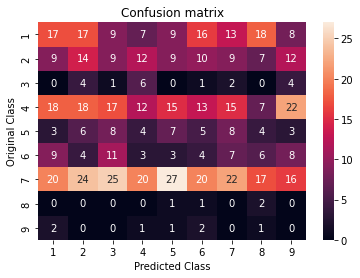

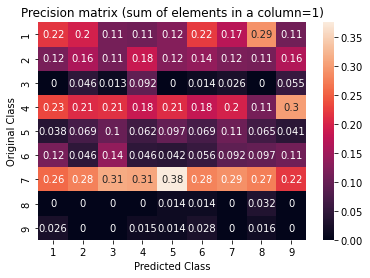

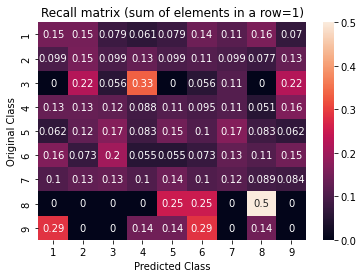

In [11]:
def generate_random_predictions(data_len):
    predicted_y = np.zeros((data_len, 9))
    for i in range(data_len):
        rand_probs = np.random.rand(1, 9)
        predicted_y[i] = rand_probs / rand_probs.sum()
    return predicted_y

cv_data_len = cv_df.shape[0]
test_data_len = test_df.shape[0]

# Generate random predictions for CV data
cv_predicted_y = generate_random_predictions(cv_data_len)
print("Log loss on Cross Validation Data using Random Model:", log_loss(y_cv, cv_predicted_y))

# Generate random predictions for test data
test_predicted_y = generate_random_predictions(test_data_len)
print("Log loss on Test Data using Random Model:", log_loss(y_test, test_predicted_y))

# Plot performance matrix for test data
predicted_y = np.argmax(test_predicted_y, axis=1)
print ("Performance matrices for test data")
plot_confusion_matrix(y_test, predicted_y + 1)

## Category: Encode the Features

### Task 11: Define the Functions for Response Coding

In [12]:
def extract_response_coding_probs(alpha, feature, df):
    total_classes = 9
    # Group the DataFrame by the feature and Class cloumns and get counts
    grouped = df.groupby([feature, 'Class']).size().reset_index(name='count')
    
    response_code_probs = {}
    feature_counts = df[feature].value_counts().to_dict()

    for value in feature_counts:
        value_group = grouped[grouped[feature] == value]
        class_probs = []
        for k in range(1, total_classes + 1):
            # Check if the current class exists for the current feature value
            if k in value_group['Class'].values:
                count = value_group[value_group['Class'] == k]['count'].values[0]
            else:
                count = 0

            numerator = count + alpha
            denominator = feature_counts[value] + total_classes * alpha
            class_probs.append(numerator / denominator)
        response_code_probs[value] = class_probs

    return response_code_probs

In [13]:
def generate_response_coded_feature(feature, df, response_code_probs):
    total_classes = 9
    default_prob = [1 / total_classes] * total_classes

    # Use the map() method to map the values of the feature column to the corresponding probabilities.
    # The get() method on the response_code_probs dictionary allows you to specify the default_prob as a fallback.
    response_coded_feature = df[feature].map(lambda x: response_code_probs.get(x, default_prob))

    return response_coded_feature.tolist()

### Task 12: Run the Function on 'Gene' and 'Variation' Features

In [14]:
alpha = 1

gene_dict = extract_response_coding_probs(alpha, 'Gene', train_df)
#print(gene_dict)

# Train the Gene feature
train_gene_rc = np.array(generate_response_coded_feature("Gene", train_df, gene_dict))
# Test the Gene feature
test_gene_rc = np.array(generate_response_coded_feature("Gene", test_df, gene_dict))
# Cross validate the Gene feature
cv_gene_rc = np.array(generate_response_coded_feature("Gene", cv_df, gene_dict))

variation_dict=extract_response_coding_probs(alpha, 'Variation', train_df)
#print(variation_dict)

# Train the Variation feature
train_variation_rc = np.array(generate_response_coded_feature("Variation", train_df, variation_dict))
# Test the Variation feature
test_variation_rc = np.array(generate_response_coded_feature("Variation", test_df, variation_dict))
# Cross validate the Variation feature
cv_variation_rc = np.array(generate_response_coded_feature("Variation", cv_df, variation_dict))

print(train_variation_rc)

[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.2]
 [0.2 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.2 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


### Task 13: Count Words in Text Field

In [15]:
def extract_counter(cls_text):
    # Use the apply() method to split each row's 'TEXT' into a list of words and then concatenate those lists
    all_words = cls_text['Text'].apply(lambda x: x.split()).explode().tolist()
 
    # Use the Counter() method to count the occurrences of each word
    word_count = Counter(all_words)
 
    return word_count

In [16]:
dict_list = []
# dict_list is a list containing 9 dictionaries, each corresponding to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    dict_list.append(extract_counter(cls_text))

# total_dict is built on the entire training text data
total_dict = extract_counter(train_df)

### Task 14: Define a Function for Response Coding

In [17]:
def generate_text_responsecoding(df, dict_list, total_dict, alpha):
    num_classes = 9  # Number of classes
    num_rows = df.shape[0]  # Number of rows in the DataFrame

    # Initialize a zeros array with shape (num_rows, num_classes)
    text_feature_rc = np.zeros((num_rows, num_classes))

    # Split the Text column into lists of words
    df['split_text'] = df['Text'].apply(lambda x: x.split())

    # Calculate response coding for each class
    for i in range(num_classes):
        row_index = 0
        for split_text in df['split_text']:
            # Use list comprehension and the map() method to apply the log probability calculations
            sum_prob = sum(
                map(
                    lambda word: math.log((dict_list[i].get(word, 0) + alpha) / (total_dict.get(word, 0) + 9*alpha)),
                    split_text
                )
            )
            # Calculate the final value for each row and class
            text_feature_rc[row_index, i] = math.exp(sum_prob / len(split_text))
            row_index += 1
 
            df.drop(['split_text'], axis=1)
           
    return text_feature_rc

### Task 15: Run the Function on Text Field

In [18]:
alpha = 10

train_text_rc  = generate_text_responsecoding(train_df, dict_list, total_dict, alpha)
test_text_rc  = generate_text_responsecoding(test_df, dict_list, total_dict, alpha)
cv_text_rc  = generate_text_responsecoding(cv_df, dict_list, total_dict, alpha)

### Task 16: One-hot Encode the Features

In [19]:
# One-hot encoding the Gene feature
gene_vectorizer = CountVectorizer()
train_gene_oh = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_oh = gene_vectorizer.transform(test_df['Gene'])
cv_gene_oh = gene_vectorizer.transform(cv_df['Gene'])

# One-hot encoding the Variation feature
variation_vectorizer = CountVectorizer()
train_variation_oh = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_oh = variation_vectorizer.transform(test_df['Variation'])
cv_variation_oh = variation_vectorizer.transform(cv_df['Variation'])

# One-hot encoding the Text feature
text_vectorizer = CountVectorizer(min_df=3)
train_text_oh = text_vectorizer.fit_transform(train_df['Text']) # A minimum degree of freedom 3 is used to ensure that extremely rare words are not included while training

test_text_oh = text_vectorizer.transform(test_df['Text'])
cv_text_oh = text_vectorizer.transform(cv_df['Text'])

### Task 17: Normalizing the Text Feature

In [20]:
train_text_oh = normalize(train_text_oh, axis=0)
test_text_oh = normalize(test_text_oh, axis=0)
cv_text_oh = normalize(cv_text_oh, axis=0)

train_text_rc = normalize(train_text_rc, axis=1, norm='l1')
test_text_rc = normalize(test_text_rc, axis=1, norm='l1')
cv_text_rc = normalize(cv_text_rc, axis=1, norm='l1')

## Category: Check Feature Importances

### Task 18: Train Single Feature Models

In [21]:
gene_log_error_array = []
alpha = 0.001

clf = SGDClassifier(alpha=alpha, penalty='l2', loss='log_loss', random_state=42)
clf.fit(train_gene_oh, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(cv_gene_oh, y_cv)
predict_array = sig_clf.predict_proba(cv_gene_oh)
gene_log_error=log_loss(y_cv, predict_array, labels=clf.classes_)
print (gene_log_error)

variation_log_error_array = []

clf = SGDClassifier(alpha=alpha, penalty='l2', loss='log_loss', random_state=42)
clf.fit(train_variation_oh, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(cv_variation_oh, y_cv)
predict_array = sig_clf.predict_proba(cv_variation_oh)
variation_log_error=log_loss(y_cv, predict_array, labels=clf.classes_)
print (variation_log_error)

text_log_error_array = []

clf = SGDClassifier(alpha=alpha, penalty='l2', loss='log_loss', random_state=42)
clf.fit(train_text_oh, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(cv_text_oh, y_cv)
predict_array = sig_clf.predict_proba(cv_text_oh)
text_log_error=log_loss(y_cv, predict_array, labels=clf.classes_)
print (text_log_error)

1.233775320450614
1.728867797687939
1.1157393672224973


## Category: Model Training

### Task 19: Stack the Features

In [22]:
train_gene_var_oh = hstack((train_gene_oh, train_variation_oh))
test_gene_var_oh = hstack((test_gene_oh, test_variation_oh))
cv_gene_var_oh = hstack((cv_gene_oh, cv_variation_oh))

train_x_oh = hstack((train_gene_var_oh, train_text_oh)).tocsr()
test_x_oh = hstack((test_gene_var_oh, test_text_oh)).tocsr()
cv_x_oh = hstack((cv_gene_var_oh, cv_text_oh)).tocsr()

train_gene_var_rc = np.hstack((train_gene_rc, train_variation_rc))
test_gene_var_rc = np.hstack((test_gene_rc, test_variation_rc))
cv_gene_var_rc = np.hstack((cv_gene_rc, cv_variation_rc))

train_x_rc = np.hstack((train_gene_var_rc, train_text_rc))
test_x_rc = np.hstack((test_gene_var_rc, test_text_rc))
cv_x_rc = np.hstack((cv_gene_var_rc, cv_text_rc))

train_y = np.array(list(train_df['Class']))
test_y = np.array(list(test_df['Class']))
cv_y = np.array(list(cv_df['Class']))

### Task 20: Train a Logistic Regression Model

In [26]:
# Function to compute the log-loss for a range of alpha values
def compute_log_loss_for_alphas(train_x, train_y, cv_x, cv_y, alpha_range):
    log_error_array = []

    for alpha_value in alpha_range:
        print("for alpha =", alpha_value)

        # Initialize and fit SGDClassifier
        classifier = SGDClassifier(class_weight='balanced', alpha=alpha_value, penalty='l2', loss='log_loss', random_state=42)
        classifier.fit(train_x, train_y)

        # Calibrate the classifier and fit it
        calibrated_classifier = CalibratedClassifierCV(classifier, method="sigmoid",cv="prefit")
        calibrated_classifier.fit(cv_x, cv_y)

        # Predict probabilities and calculate the log-loss
        predicted_probs = calibrated_classifier.predict_proba(cv_x)
        log_loss_value = log_loss(cv_y, predicted_probs, labels=classifier.classes_)
        log_error_array.append(log_loss_value)

        print("Log Loss :", log_loss_value)

    return log_error_array

# Define alpha values
alpha_values = np.logspace(-4, 2, num=7, base=10).tolist()

# Compute the log-loss for each alpha
cv_log_error_array = compute_log_loss_for_alphas(train_x_oh, train_y, cv_x_oh, cv_y, alpha_values)

# Find the best alpha and retrain the model
best_alpha_index = np.argmin(cv_log_error_array)
best_alpha = alpha_values[best_alpha_index]
final_clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log_loss', random_state=42)
final_clf.fit(train_x_oh, train_y)

# Calibrate and fit the final classifier
final_sig_clf = CalibratedClassifierCV(final_clf, method="sigmoid",cv="prefit")
final_sig_clf.fit(cv_x_oh, cv_y)

# Predict on test data and calculate the log-loss
final_predictions = final_sig_clf.predict_proba(test_x_oh)
test_log_loss = log_loss(y_test, final_predictions, labels=final_clf.classes_)

print('For values of best alpha =', best_alpha, "The test log loss is:", test_log_loss)

for alpha = 0.0001
Log Loss : 1.0798649702288698
for alpha = 0.001
Log Loss : 1.0376303270672111
for alpha = 0.01
Log Loss : 1.1567670238406496
for alpha = 0.1
Log Loss : 1.542621650833605
for alpha = 1.0
Log Loss : 1.701764440537983
for alpha = 10.0
Log Loss : 1.7219024532998126
for alpha = 100.0
Log Loss : 1.724010440102097
For values of best alpha = 0.001 The test log loss is: 1.0904335806624668
